In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')
sys.path.insert(0, "../0.data-download/scripts/")
from data_loader import load_data, load_train_test_data

In [2]:
# data path
data_directory = "../0.data-download/data/"

In [3]:
# load the training data 
data = load_train_test_data(data_directory, train_or_test = "all")
dfs = data[0]
dfs_test = data[1]

In [4]:
# set a unique dataframe that can be appended from
training_df_age = dfs

# group by age and create new dataframes that can be appended to
groups = training_df_age.groupby("age_and_sex")
adult_dependency_df = pd.DataFrame()
ped_dependency_df = pd.DataFrame()
for name, training_df_age in groups:
    
    # append rows that contain Adult samples (male or female) to the new adult dependency dataframe
    if name == "Adult_Male" or name == "Adult_Female" or name == "Adult_nan":
        adult_dependency_df = adult_dependency_df.append(training_df_age)
        adult_dependency_df = adult_dependency_df.reset_index(drop=True)
        
    # append rows that contain Pediatric samples (male ore female) to the new pediatric dataframe
    else :
        ped_dependency_df = ped_dependency_df.append(training_df_age)
        ped_dependency_df = ped_dependency_df.reset_index(drop=True)           

In [5]:
# set a unique dataframe that can be appended from
training_df_sex = dfs

# group by sex and create new dataframes to be appended to 
groups_sex = training_df_sex.groupby("age_and_sex")
male_dependency_df = pd.DataFrame()
female_dependency_df = pd.DataFrame()
for name, training_df_sex in groups_sex:
    
    # append rows that contain Male samples (Adult or Pediatric) to the new male dependency dataframe and filter out samples that contain no gender info
    if name == "Adult_Male" or name == "Pediatric_Male" and name != "Pediatric_nan" and name != "Adult_nan":
        male_dependency_df = male_dependency_df.append(training_df_sex)
        male_dependency_df = male_dependency_df.reset_index(drop=True)
        
    # append rows that contain Female samples (Adult or Pediatric) to the new female dependency dataframe and filter out samples that contain no gender info
    elif name == "Adult_Female" or name == "Pediatric_Female" and name != "Pediatric_nan" and name != "Adult_nan":
        female_dependency_df = female_dependency_df.append(training_df_sex)
        female_dependency_df = female_dependency_df.reset_index(drop=True)          

In [6]:
print(adult_dependency_df.shape)
adult_dependency_df.head(3)

(648, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000247,0.005276,0.005882,0.012680,0.007825,0.175868,0.044973,0.050079,0.360443,0.026981,...,0.128340,0.149563,0.823566,0.011052,0.056551,0.014706,0.166423,0.100487,0.719074,Adult_Female
1,ACH-001041,0.098351,0.032719,0.022677,0.010570,0.129347,0.021843,0.055165,0.137869,0.023306,...,0.632935,0.284356,0.932901,0.112482,0.088540,0.019232,0.023804,0.191826,0.093586,Adult_Female
2,ACH-000202,0.004425,0.106529,0.044399,0.028659,0.010469,0.057135,0.011902,0.169604,0.002245,...,0.099786,0.015028,0.637188,0.057165,0.018522,0.046276,0.009550,0.019274,0.041495,Adult_Female


In [7]:
print(ped_dependency_df.shape)
ped_dependency_df.head(3)

(103, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-001211,0.041463,0.065738,0.012205,0.014583,0.055827,0.104585,0.027997,0.419748,0.030935,...,0.413904,0.368908,0.348387,0.022874,0.052376,0.214191,0.162152,0.129205,0.012379,Pediatric_Female
1,ACH-000160,0.171900,0.012344,0.038006,0.031264,0.199756,0.021596,0.020203,0.702919,0.023613,...,0.550983,0.705460,0.537355,0.004859,0.015293,0.045382,0.044709,0.350055,0.363109,Pediatric_Female
2,ACH-001344,0.075448,0.033579,0.027061,0.004368,0.137909,0.061876,0.001224,0.030429,0.060600,...,0.452783,0.025672,0.929539,0.028297,0.019490,0.041086,0.226172,0.064373,0.485761,Pediatric_Female


In [8]:
print(male_dependency_df.shape)
male_dependency_df.head(3)

(423, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000580,0.064392,0.002782,0.018333,0.014821,0.149273,0.007958,0.005666,0.251693,0.245629,...,0.761403,0.058012,0.778242,0.025119,0.057699,0.028398,0.004575,0.078556,0.445835,Adult_Male
1,ACH-000873,0.062351,0.098739,0.005860,0.022463,0.029743,0.065033,0.080748,0.215144,0.019621,...,0.217666,0.061531,0.082790,0.038939,0.121943,0.020349,0.016384,0.021788,0.414571,Adult_Male
2,ACH-000762,0.013739,0.087361,0.036031,0.076425,0.009779,0.013797,0.040492,0.039570,0.028071,...,0.124729,0.047392,0.509484,0.184267,0.021948,0.006525,0.004001,0.017017,0.335234,Adult_Male


In [9]:
print(female_dependency_df.shape)
female_dependency_df.head(3)

(323, 16710)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000247,0.005276,0.005882,0.012680,0.007825,0.175868,0.044973,0.050079,0.360443,0.026981,...,0.128340,0.149563,0.823566,0.011052,0.056551,0.014706,0.166423,0.100487,0.719074,Adult_Female
1,ACH-001041,0.098351,0.032719,0.022677,0.010570,0.129347,0.021843,0.055165,0.137869,0.023306,...,0.632935,0.284356,0.932901,0.112482,0.088540,0.019232,0.023804,0.191826,0.093586,Adult_Female
2,ACH-000202,0.004425,0.106529,0.044399,0.028659,0.010469,0.057135,0.011902,0.169604,0.002245,...,0.099786,0.015028,0.637188,0.057165,0.018522,0.046276,0.009550,0.019274,0.041495,Adult_Female


In [10]:
#drop the string values from all dataframes
adult_dependency_df_float = adult_dependency_df.drop(columns= ["DepMap_ID", "age_and_sex"])
ped_dependency_df_float =ped_dependency_df.drop(columns= ["DepMap_ID", "age_and_sex"])

male_dependency_df_float = male_dependency_df.drop(columns= ["DepMap_ID", "age_and_sex"])
female_dependency_df_float =female_dependency_df.drop(columns= ["DepMap_ID", "age_and_sex"])

dependency_df = dfs.drop(columns= "age_and_sex")
dependency_df = dependency_df.set_index("DepMap_ID")

In [11]:
# t_test comparing gene dependencies in adult vs pediatric samples
t_test = ttest_ind(adult_dependency_df_float, ped_dependency_df_float)
t_test = pd.DataFrame(t_test).T
t_test.columns = ['t_stat', 'p_value']
print(t_test.shape)
t_test.head(3)

(16708, 2)


,t_stat,p_value
0,-1.572967,0.116149
1,-0.187186,0.851565
2,1.752934,0.080022


In [12]:
# t_test comparing gene dependencies in male vs female samples
t_test_sex = ttest_ind(male_dependency_df_float, female_dependency_df_float)
t_test_sex = pd.DataFrame(t_test_sex).T
t_test_sex.columns = ['t_stat', 'p_value']
print(t_test_sex.shape)
t_test_sex.head(3)

(16708, 2)


,t_stat,p_value
0,-0.403836,0.686449
1,-0.157533,0.874867
2,-1.187370,0.235461


In [13]:
print(dependency_df.shape)
dependency_df.head(3)

(751, 16708)


,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZUP1 (221302),ZW10 (9183),ZWILCH (55055),ZWINT (11130),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000580,0.064392,0.002782,0.018333,0.014821,0.149273,0.007958,0.005666,0.251693,0.245629,0.016264,...,0.056975,0.761403,0.058012,0.778242,0.025119,0.057699,0.028398,0.004575,0.078556,0.445835
ACH-000247,0.005276,0.005882,0.012680,0.007825,0.175868,0.044973,0.050079,0.360443,0.026981,0.003449,...,0.019143,0.128340,0.149563,0.823566,0.011052,0.056551,0.014706,0.166423,0.100487,0.719074
ACH-000873,0.062351,0.098739,0.005860,0.022463,0.029743,0.065033,0.080748,0.215144,0.019621,0.081623,...,0.038808,0.217666,0.061531,0.082790,0.038939,0.121943,0.020349,0.016384,0.021788,0.414571


In [14]:
# calculate variance of each gene then send the results plus the gene info into a new dataframe
variance = dependency_df.var()
variance_list = variance.tolist()
column_names = ['variance']
variance_df = pd.DataFrame(variance, columns= column_names)
variance_df = variance_df.sort_index(ascending=True).reset_index()
variance_df = variance_df.rename(columns= {"index":"gene_ID"})
print(variance_df.shape)
variance_df.head(3)

(16708, 2)


,gene_ID,variance
0,A1BG (1),0.004470
1,A1CF (29974),0.004603
2,A2M (2),0.000812


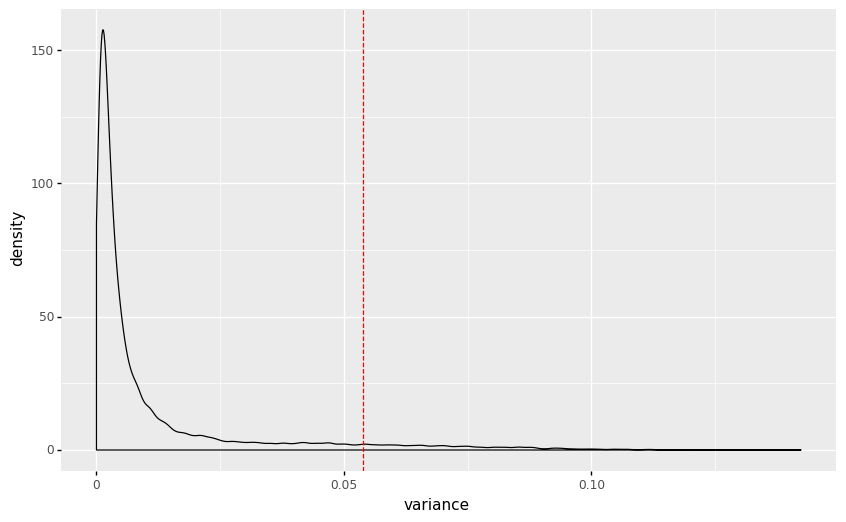

<ggplot: (8772143134961)>

In [15]:
# finding the smallest gene variation out of the 1000 largest gene variations to set the top 1000 gene variances threshold
n = variance_df["variance"].nlargest(1000)
variance_theshold = n.min().astype(float)

# plotting variance density chart and marking the 1000 largest gene variation cutoff
variance_density_plot = (p9.ggplot(variance_df, p9.aes(x = 'variance')) 
                         + p9.geom_density() 
                         + p9.geom_vline(xintercept = variance_theshold, linetype = "dashed", color = "red") 
                         + p9.theme(figure_size = (10,6))
                         )

# save the figure
density_path = pathlib.Path("./figures/variance_density_plot.png")
variance_density_plot.save(density_path)
variance_density_plot

In [16]:
# first create new dataframe containing gene info as well as both adult-pediatric and male-female t-test results and variance results
df = variance_df.assign(ttest_A_vs_P = t_test.t_stat.astype(float), ttest_M_vs_F = t_test_sex.t_stat.astype(float)) 

# and save the new dataframe as a .csv
testing_df_output = pathlib.Path("../0.data-download/data/genes_variances_and_t-tests_df.csv")
df.to_csv(testing_df_output, index = False)
print(df.shape)
df.head(3)

(16708, 4)


,gene_ID,variance,ttest_A_vs_P,ttest_M_vs_F
0,A1BG (1),0.004470,-1.572967,-0.403836
1,A1CF (29974),0.004603,-0.187186,-0.157533
2,A2M (2),0.000812,1.752934,-1.187370


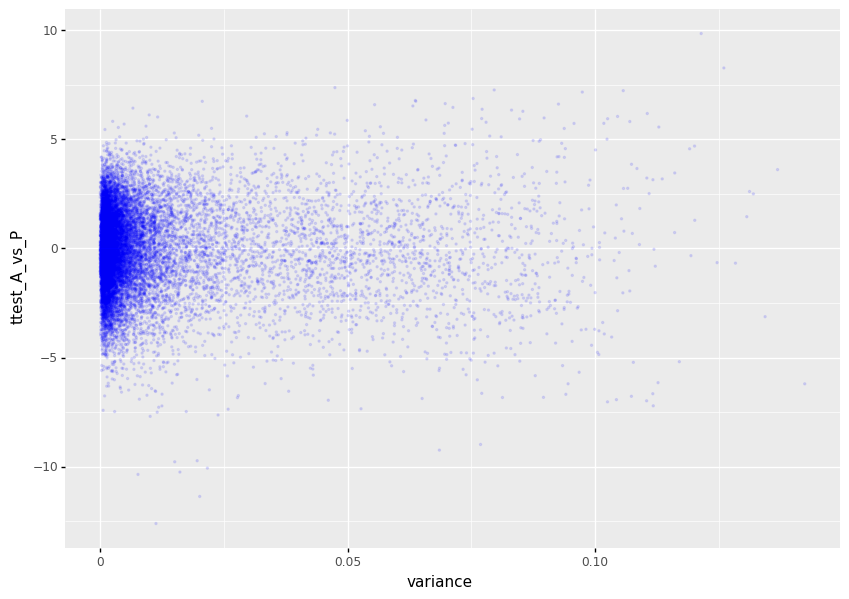

<ggplot: (8772136892558)>

In [17]:
# plot adult-pediatric ttest versus variance
A_vs_P_by_variance_plot = (p9.ggplot(data = df, mapping = p9.aes(x = 'variance', y = 'ttest_A_vs_P')) 
                           + p9.geom_point(size = 0.4, alpha = 0.1, color = 'blue') 
                           + p9.theme(figure_size = (10,7))
                           )

# save the figure
adult_vs_pediatric_path = pathlib.Path("./figures/adult-pediatric_ttest_vs_variance.png")
A_vs_P_by_variance_plot.save(adult_vs_pediatric_path)
A_vs_P_by_variance_plot

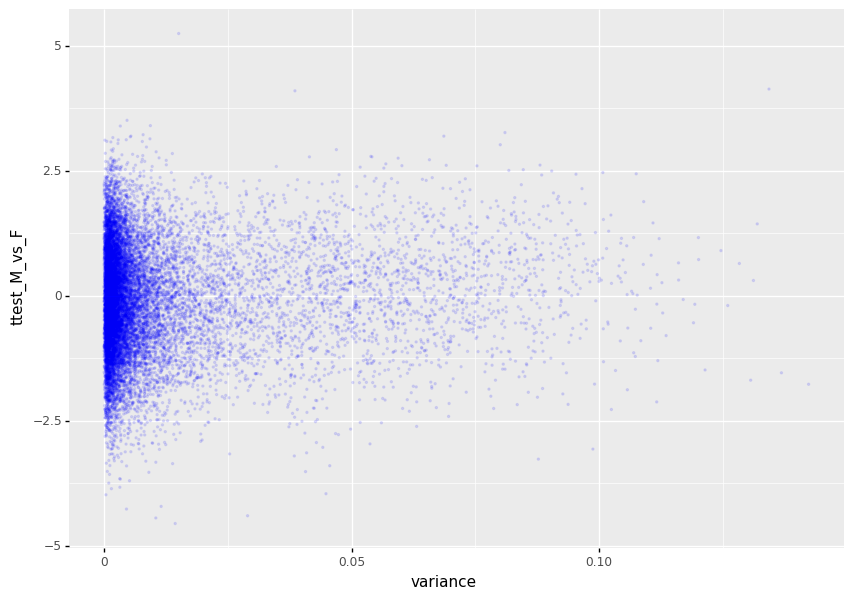

<ggplot: (8772293799144)>

In [18]:
# plot male-female ttest versus gene variance
M_vs_F_by_variance_plot = (p9.ggplot(data = df, mapping = p9.aes(x = 'variance', y = 'ttest_M_vs_F')) 
                           + p9.geom_point(size = 0.4, alpha = 0.1, color = 'blue') 
                           + p9.theme(figure_size = (10,7))
                           )

# save the figure
male_vs_female_path = pathlib.Path("./figures/male-female_ttest_vs_variance.png")
M_vs_F_by_variance_plot.save(male_vs_female_path)
M_vs_F_by_variance_plot